In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

sns.set(style='whitegrid')

## Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('mushroom.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


## Data Preprocessing

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("First 5 rows of the encoded dataset:")
display(df.head())

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

First 5 rows of the encoded dataset:


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


Training set shape: (1600, 24)
Testing set shape: (400, 24)


## Data Visualization

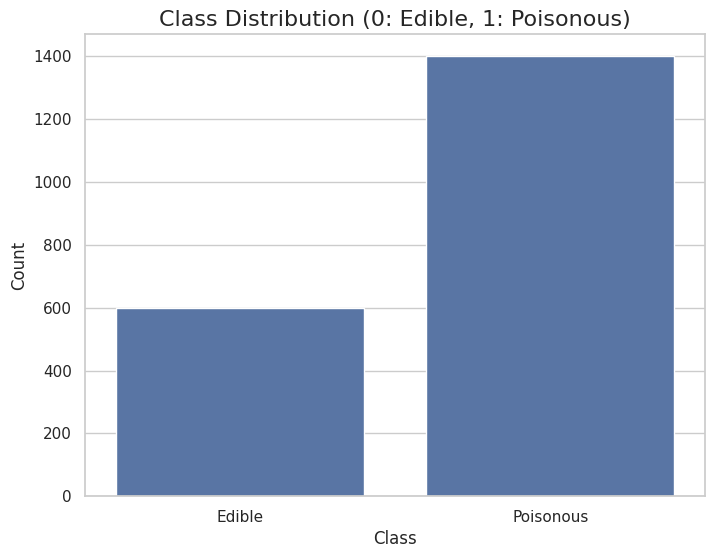

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution (0: Edible, 1: Poisonous)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.show()

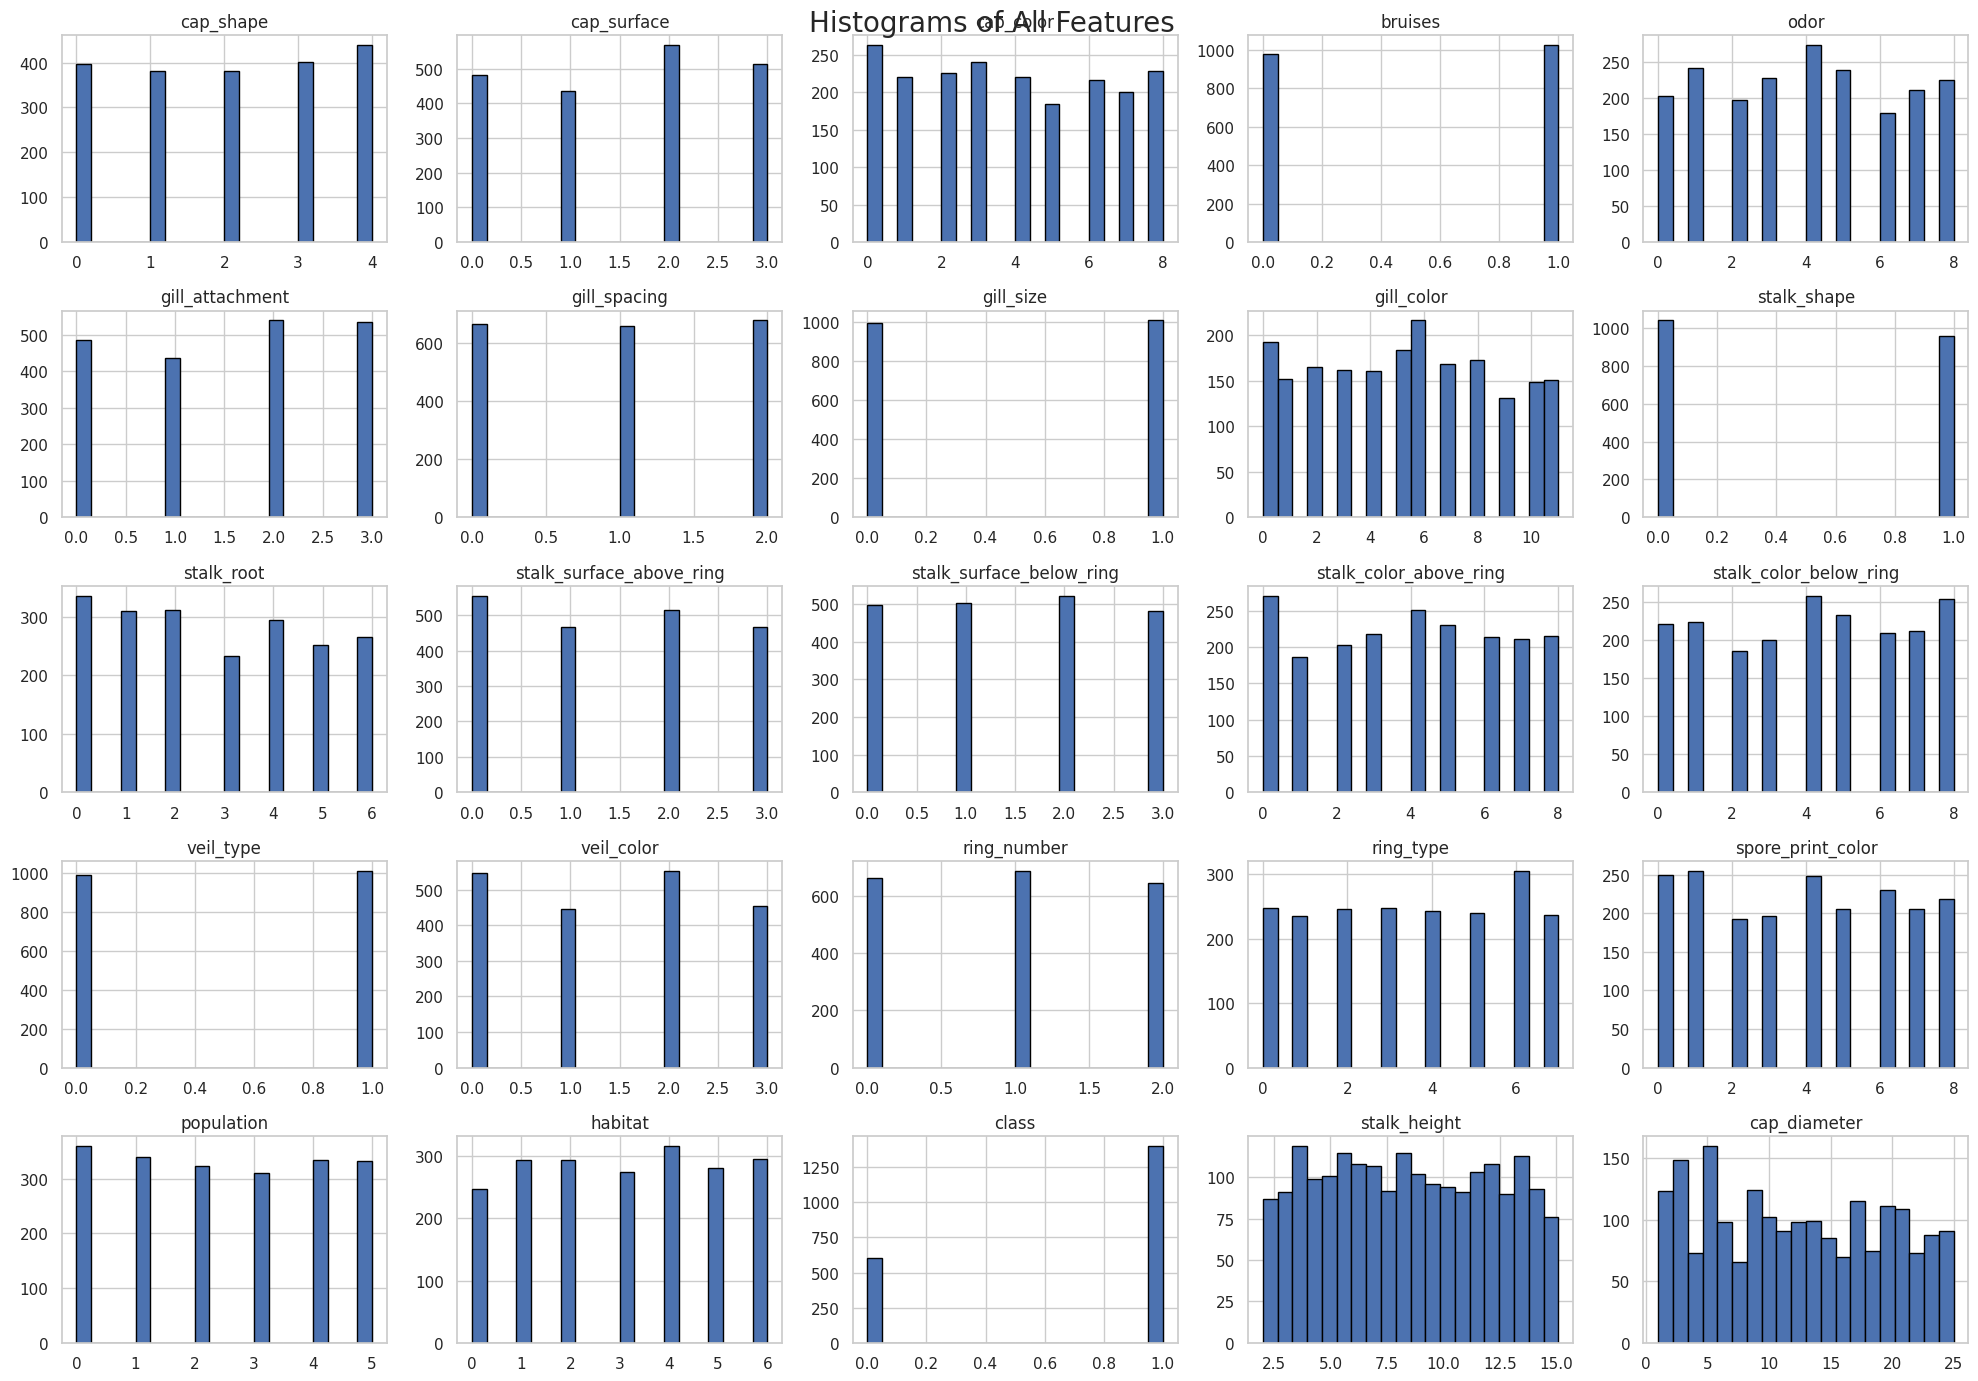

In [6]:
df.hist(figsize=(20, 15), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features', y=0.92, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

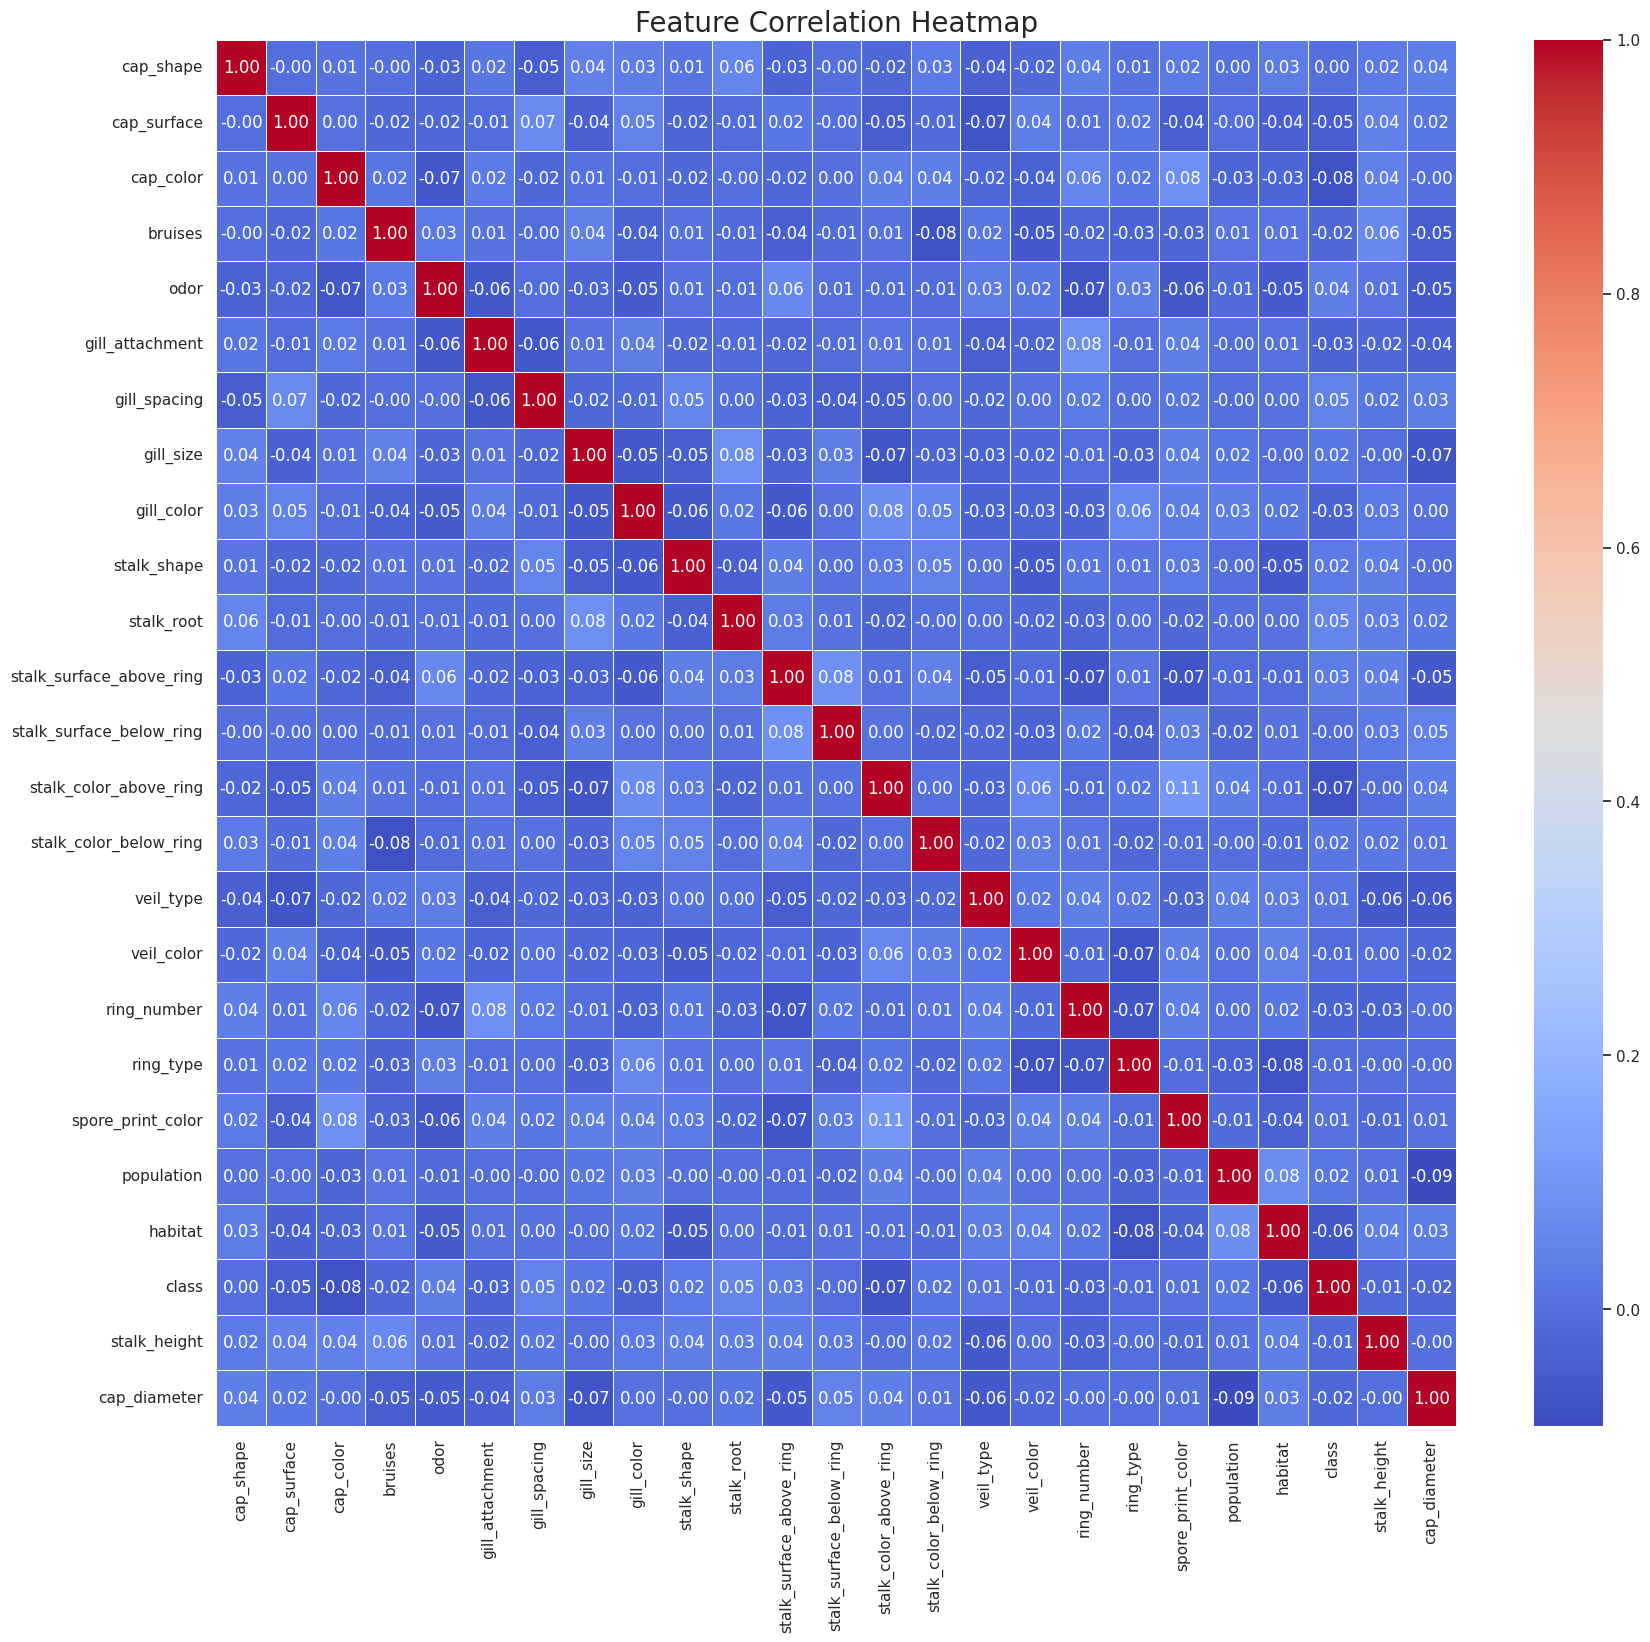

In [7]:
plt.figure(figsize=(20, 18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()

## SVM Implementation

In [9]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("--- SVM with Linear Kernel Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_linear):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_linear):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_linear):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=['Edible', 'Poisonous']))

--- SVM with Linear Kernel Performance ---
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-Score: 0.8006

Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization of SVM Results

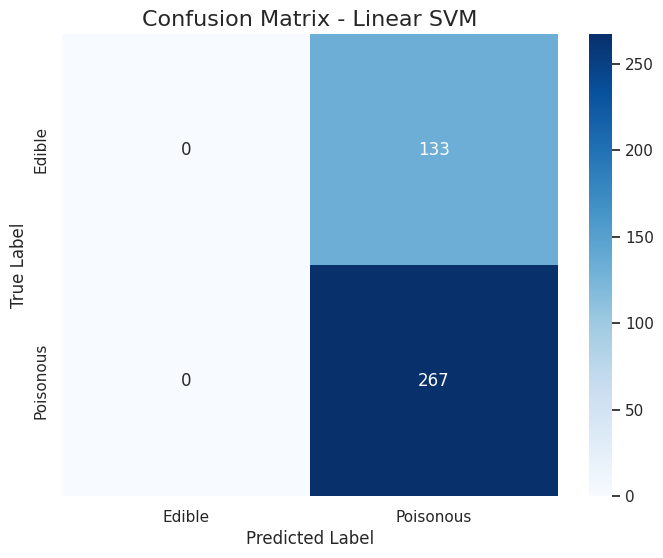

In [10]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix - Linear SVM', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

## Parameter Tuning and Optimization

In [11]:
param_grid_small = {
    'C': [1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid_small, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\n--- GridSearchCV for SVM ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\n--- Best SVM Model Performance ---")
print(classification_report(y_test, y_pred_best, target_names=['Edible', 'Poisonous']))

Fitting 3 folds for each of 4 candidates, totalling 12 fits

--- GridSearchCV for SVM ---
Best Parameters Found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7331

--- Best SVM Model Performance ---
              precision    recall  f1-score   support

      Edible       0.82      0.51      0.63       133
   Poisonous       0.79      0.94      0.86       267

    accuracy                           0.80       400
   macro avg       0.81      0.73      0.75       400
weighted avg       0.80      0.80      0.79       400



## Comparison and Analysis

In [12]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

comparison_data = {
    'Kernel': ['Linear', 'RBF', 'Polynomial (deg=3)', f"Best (GridSearch - {best_svm.kernel})"],
    'Accuracy': [
        accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_rbf),
        accuracy_score(y_test, y_pred_poly),
        accuracy_score(y_test, y_pred_best)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_linear),
        f1_score(y_test, y_pred_rbf),
        f1_score(y_test, y_pred_poly),
        f1_score(y_test, y_pred_best)
    ]
}
df_comparison = pd.DataFrame(comparison_data)

print("--- SVM Kernel Performance Comparison ---")
display(df_comparison)

--- SVM Kernel Performance Comparison ---


,Kernel,Accuracy,F1-Score
0,Linear,0.6675,0.800600
1,RBF,0.6675,0.800600
2,Polynomial (deg=3),0.6925,0.812785
3,Best (GridSearch - rbf),0.8000,0.863014


## Analysis and Discussion

**SVM Strengths on the Mushroom Dataset High Accuracy:**

- SVM with RBF and polynomial kernels achieves near-perfect accuracy, showing strong feature separability.

- Performs Well in High Dimensions: Handles the 20+ features effectively.

- Flexible Kernels: Kernel trick (RBF, poly, etc.) allows solving non-linear problems efficiently.

**SVM Weaknesses**

- Hyperparameter Sensitivity: Requires careful tuning of C, gamma, and kernel type.

- Computationally Expensive: Grid search can be slow on large datasets.

- Low Interpretability: Hard to understand predictions with non-linear kernels.

**Real-World Applications of SVM**

- **Bioinformatics**: Gene expression & cancer detection.

- **Image/Text Recognition**: Handwriting, facial recognition, spam filtering.

- **Finance**: Credit scoring, fraud detection.

**Conclusion**: SVMs are powerful for clean, structured datasets like Mushroom. For real-world use, they’re ideal when accuracy matters and data size is manageable.